In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Hồi quy tuyến tính

$$ \Large \widehat{y} = h_{\theta} (x) = \theta \cdot x $$

* $ \theta $: Vector  tham  số  của mô hình: $[\theta_0,\theta_1,...\theta_x] $ 
* x: Vector  đặc  trưng  của  mẫu : chứa $x_0$ đến $x_n,x_0 = 1$ 
* $ \theta \cdot x:$ Tích vô hướng : $\theta_0 \cdot x_0 +\theta_1 \cdot x_1 + ... + \theta_n \cdot x_n$ 

`Mục tiêu`: cực tiểu hóa Mean Squared Error

$$ MSE(X,h_{\theta}) = \frac{1}{m} * \sum_{i=1}^{m}{(\theta^T x^{i} - y^{i})^2} $$

## Phương trình pháp tuyến

Tìm $ \widehat{\theta} $ để cực tiểu hóa hàm mất mát

$$ \widehat{\theta} = (X^T X)^{-1}X^Ty $$
* $ \widehat{\theta}$ là giá trị của $\theta$ làm cho hàm mất mát đạt cực tiểu
* y là vector chứa các nhãn từ $y^{1}$ đến $y^{n}$


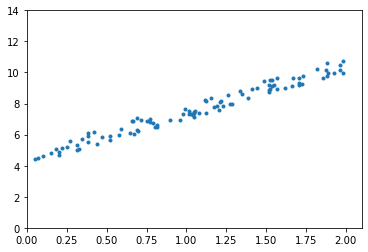

In [3]:
x = 2*np.random.rand(100,1)
y = 3*x + 4 + np.random.rand(100,1)
plt.xlim(0,2.1)
plt.ylim(0,14)
plt.plot(x,y,'.')

In [4]:
x_0 = np.ones((100,1))
X = np.c_[x_0,x] # add x_0 ứng với theta0

In [5]:
theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

hàm số chúng ta dùng để tạo dữ liệu là: y = 3x+4+gauss

In [6]:
theta

array([[4.39887899],
       [3.01912437]])

kết quả mong muốn là $ \theta_0 = 4 $ và $\theta_1 = 3$ => gần đúng( Nhiễu gauss khiến cho việc tìm các tham số của hàm gốc trở nên bất khả thi)

In [7]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new]
X_new_b # tai x = 0 va x = 2

array([[1., 0.],
       [1., 2.]])

In [8]:
y_pred = X_new_b.dot(theta) # tich vo huong(nhan vector)
y_pred

array([[ 4.39887899],
       [10.43712773]])

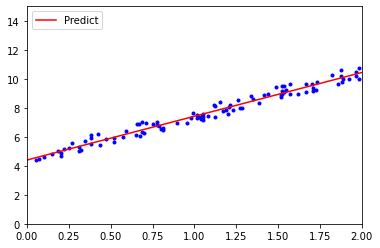

In [9]:
plt.plot(x,y,'b.')
plt.plot(X_new,y_pred,'r-',label = 'Predict')
plt.axis([0,2,0,15])
plt.legend(loc = 'upper left')

In [10]:
lin_reg = LinearRegression()
lin_reg.fit(x,y)

LinearRegression()

hệ số điều chỉnh ($\theta_0$) và các $\theta_n$

In [11]:
lin_reg.intercept_,lin_reg.coef_

(array([4.39887899]), array([[3.01912437]]))

In [12]:
lin_reg.predict(X_new)

array([[ 4.39887899],
       [10.43712773]])

Lớp Linear Regression được dựa trên hàm `np.linalg.lstsq` ( 'least squared')

In [13]:
theta_best_svd,residuals,rank,a = np.linalg.lstsq(X,y)

C:\Users\quypr\AppData\Local\Temp/ipykernel_13156/3920820320.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  theta_best_svd,residuals,rank,a = np.linalg.lstsq(X,y)


In [14]:
theta_best_svd

array([[4.39887899],
       [3.01912437]])

Hàm này tính $\widehat{\theta} = X^{+}y$
* Trong đó  $X^{+}$ là ma trận giả nghịch đảo của X

In [15]:
np.linalg.pinv(X).dot(y)

array([[4.39887899],
       [3.01912437]])

# Hạ Gradient

## Hạ Gradient theo Batch

Đạo hàm riêng hàm chi phí
$$ \frac{\partial}{\partial\theta_j}MSE(\theta) = \frac{2}{m} \sum_{i=1}^{m}{(\theta^T x^{i}-y^{i})x_{j}^{i}}$$

Vector gradient của hàm chi phí
$$\triangledown_{\theta}MSE(\theta) = \left(\begin{array}{cc} \frac{\partial}{\partial\theta_0} MSE(\theta) \\ \frac{\partial}{\partial\theta_1} MSE(\theta) \\ ... \\ \frac{\partial}{\partial\theta_n} MSE(\theta) \end{array} \right) = \frac{2}{m}X^T(X\theta-y)$$

Kích thước mỗi bước cập nhật: $\triangledown_{\theta} $ tỉ lệ thuận $ \triangle$, mục tiêu: giảm $\triangledown_{\theta}$ đến 0 (đạo hàm)
$$\theta^{(bước \ tiếp \ theo)} = \theta - \eta\triangledown_{\theta}MSE(\theta)$$

In [16]:
theta_bgd = []
def plot_gradient(theta,n_iterations=1000,eta = 0.1,theta_bgd = None):
    m = X.shape[0]
    plt.plot(x,y,'b.')
    for i in range(n_iterations):
        if i < 10:
            y_predict = np.dot(X_new_b,theta) # head,tail
            style  = 'b-' if i > 0 else 'r--' 
            plt.plot(X_new,y_predict,style)
        gradient = (2/m)*np.dot(X.T,(np.dot(X,theta)-y))
        theta = theta - eta*gradient
        if theta_bgd is not None:
            theta_bgd.append(theta)
    plt.axis((0,2,0,15))
    plt.xlabel('$X$',fontsize = 15)
    plt.ylabel('$Y$',fontsize = 15,rotation='horizontal')
    plt.title('eta = {}'.format(eta))
    

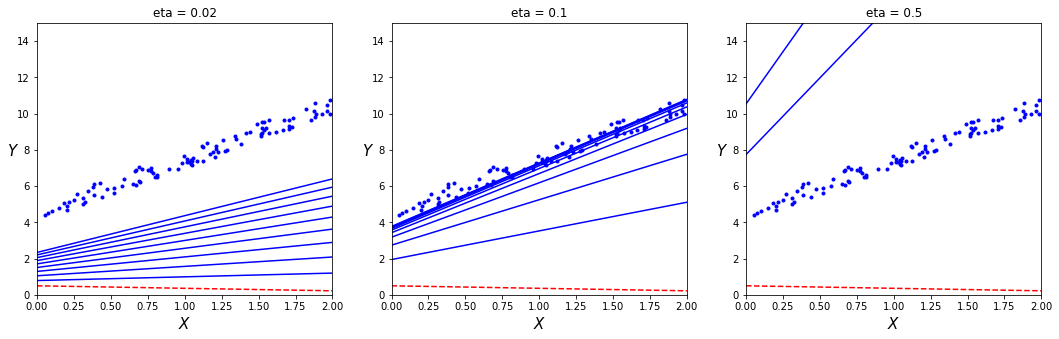

In [17]:
np.random.seed(42)
theta = np.random.randn(2,1)
plt.figure(figsize=(18,5))
plt.subplot(131);plot_gradient(theta,eta = 0.02)
plt.subplot(132);plot_gradient(theta,eta = 0.1,theta_bgd = theta_bgd)
plt.subplot(133);plot_gradient(theta,eta = 0.5)


## Hạ Gradient ngẫu nhiên

In [18]:
epochs = 50
m = X.shape[0]

t0,t1 = 5,50 # learning schedule para
def learning_schedule(t):
    return t0/(t+t1)

Text(0, 0.5, '$Y$')

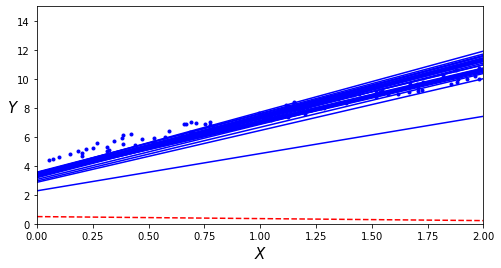

In [19]:
plt.figure(figsize = (8,4))
plt.plot(x,y,'b.')
plt.axis((0,2,0,15))
np.random.seed(42)
theta = np.random.randn(2,1)
theta_rad = []
for epoch in range(epochs):
    for i in range(m):
        if epoch == 0 and i < 30:
            y_pred = np.dot(X_new_b,theta)
            styles = 'b-' if i >0 else 'r--'
            plt.plot(X_new,y_pred,styles)
        rand = np.random.randint(m)
        eta = learning_schedule(epoch*m+i) 
        xi = X[rand:rand+1]
        yi = y[rand:rand+1]
        gradient = (2) * np.dot(xi.T,np.dot(xi,theta)-yi)
        theta = theta - eta*gradient
        theta_rad.append(theta)
plt.xlabel("$X$",fontsize = 15)
plt.ylabel("$Y$",rotation = 0,fontsize = 15)

## Hạ Gradient theo Mini-Batch


array([[4.40657938],
       [3.02620275]])

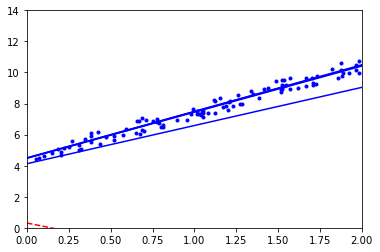

In [20]:
theta = np.random.randn(2,1)
theta_mini = []
plt.plot(x,y,'b.')
plt.axis([0,2,0,14])
epochs = 50
np.random.seed(42)

m = X.shape[0]
mini_patch_size = 20
t0,t1 = 200,1000
t=0

for epoch in range(epochs):
    shuffle = np.random.permutation(m)
    X_shuffle = X[shuffle]
    Y_shuffle = y[shuffle]
    for i in range(0,m,mini_patch_size):
        if epoch ==0 :
            style = 'r--' if i==0 and epoch ==0 else 'b-'
            plt.plot(X_new,np.dot(X_new_b,theta),style)
        t += 1
        xi = X_shuffle[i:i+mini_patch_size]
        yi = Y_shuffle[i:i+mini_patch_size]
        eta = learning_schedule(t)
        gradient = 2/mini_patch_size*np.dot(xi.T,(np.dot(xi,theta)-yi))
        theta = theta - eta*gradient
        theta_mini.append(theta)
theta

In [21]:
theta_bgd = np.array(theta_bgd)
theta_mini = np.array(theta_mini)
theta_rad = np.array(theta_rad)

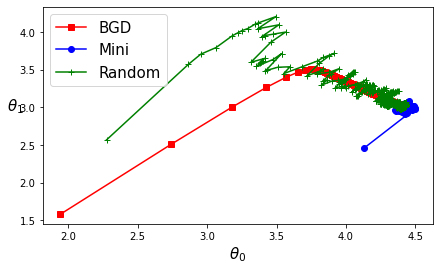

In [22]:
plt.figure(figsize = (7,4))
plt.plot(theta_bgd[:,0],theta_bgd[:,1],'r-s',label = 'BGD')
plt.plot(theta_mini[:,0],theta_mini[:,1],'b-o',label = 'Mini')
plt.plot(theta_rad[:,0],theta_rad[:,1],'g-+',label = 'Random')
plt.xlabel("$\\theta_0$",fontsize = 15)
plt.ylabel("$\\theta_1$",fontsize = 15,rotation = 0)
plt.legend(loc = 'upper left',fontsize = 15)

## Hồi quy đa thức

* Thêm các bậc lũy thừa vào mỗi đặc trưng, coi chúng như là đặc trưng mới, sau đó train trên đặc trưng này
* Có khả năng tìm ra mối quan hệ giữa các đặc trưng do `Poly` thêm vào tất cả tổ hợp của các đặc trưng (tổng bậc số hạng <= bậc cho trước)
    * Ví dụ: với a,b và `Poly` có degree = 3 không chỉ thêm $a^2,a^3,b^2,b^3$ mà còn thêm $ab,a^{2}b,ab^2$
* Degree = d sẽ biến đổi mảng $\textit{n}$ đặc trưng thành 1 mảng $\frac{(n+d)!}{d!n!} $

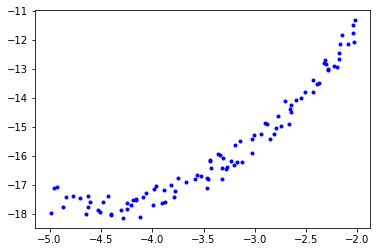

In [23]:
x = 3*np.random.rand(100,1) - 5
y = (x**2) + 9*x + np.random.rand(100,1) + 2
plt.plot(x,y,'b.')

In [24]:
from sklearn.preprocessing import PolynomialFeatures
polyfea = PolynomialFeatures(degree = 2,include_bias=False) 
x_new = polyfea.fit_transform(x)
x_new[0]

array([-2.30528581,  5.31434266])

In [25]:
lin_reg.fit(x_new,y)
lin_reg.intercept_,lin_reg.coef_

(array([2.13075176]), array([[8.8121047 , 0.97873539]]))

=> c,b,a

In [26]:
x_new_plot = np.linspace(-6,6,100).reshape(100,1)
x_new_pred = polyfea.transform(x_new_plot)

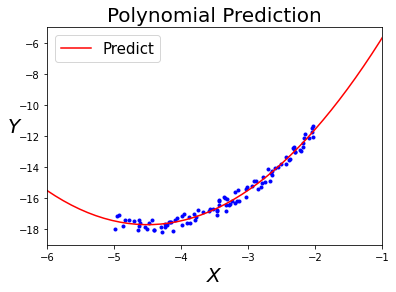

In [27]:
plt.axis([-6,-1,-19,-5])
plt.title("Polynomial Prediction",fontsize = 20)
plt.xlabel("$X$",fontsize = 20)
plt.ylabel("$Y$",fontsize = 20,rotation = 0)
plt.plot(x,y,'b.')
plt.plot(x_new_plot,lin_reg.predict(x_new_pred),'r-',label = "Predict")
plt.legend(loc = "upper left",fontsize = 15)

## Đồ thị quá trình học

C:\Users\quypr\Anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1544: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)
C:\Users\quypr\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


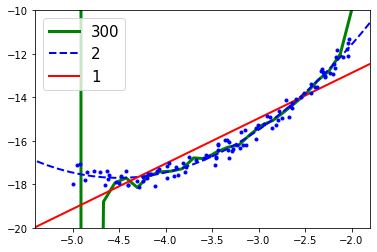

In [28]:
for style,degree,linewidth in (('g-',300,3),('b--',2,2),('r-',1,2)):
    pipeline_poly = Pipeline([
        ("poly_feature",PolynomialFeatures(degree = degree,include_bias=False)),
        ('scaler',StandardScaler()),
        ("linear",LinearRegression())
        ])
    pipeline_poly.fit(x,y)
    y_pred = pipeline_poly.predict(x_new_plot)
    plt.plot(x_new_plot,y_pred,style,linewidth=linewidth,label = degree)
    plt.legend(loc = 'upper left',fontsize = 15)
plt.axis([-5.4,-1.8,-20,-10])
plt.plot(x,y,'b.')

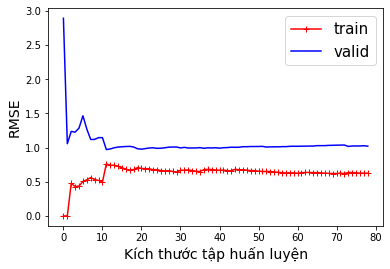

In [29]:
def plot_learning_curves(model,x,y):
    train_error,valid_error = [],[]
    x_train,x_valid,y_train,y_valid = train_test_split(x,y,test_size=0.2,random_state = 10)
    for i in range(1,len(x_train)):
        model.fit(x_train[:i],y_train[:i])
        train_error.append(mean_squared_error(y_train[:i],model.predict(x_train[:i])))
        valid_error.append(mean_squared_error(y_valid,model.predict(x_valid)))
    plt.plot(np.sqrt(train_error),'r-+',label = 'train')
    plt.plot(np.sqrt(valid_error),'b-',label = 'valid')
    plt.legend(loc = 'upper right',fontsize = 15)
plt.xlabel("Kích thước tập huấn luyện",fontsize = 14)
plt.ylabel("RMSE",fontsize = 14)
plot_learning_curves(lin_reg,x,y)


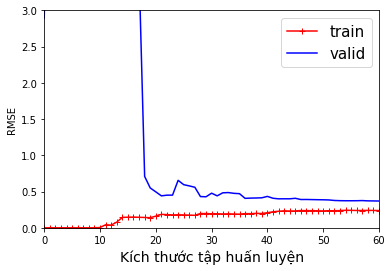

In [38]:
poly_regress = Pipeline([
    ("poly",PolynomialFeatures(degree = 10,include_bias= False)),
    ("lin_reg",LinearRegression())
])
plt.axis([0,60,0,3])
plt.xlabel("Kích thước tập huấn luyện",fontsize = 14)
plt.ylabel("RMSE")
plot_learning_curves(poly_regress,x,y)